### I take a homework #5 for start 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
 
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load data

In [2]:
dataset = load_boston()
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Let's add MEDV column into data table

In [4]:
data['MEDV'] = dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### View some info about data

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Check number of rows for each column

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Add some functions from lesson:

Будем использовать линейную регрессию для тестирования качества данных

In [7]:
def get_score(X,y, random_seed=42, model=None):
  if model is None:
    model = LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  test_score = model.score(X_test, y_test)
  print(f'Model: {model}     Train score: {train_score}      Test score: {test_score}')
  return test_score

Для поиска выбросов будем использовать boxplot

In [8]:
def get_boxplot(X, columns=[]):
  for i in columns:
    sns.boxplot(x=X[i])
  pass  

def get_pairplot(X, columns=None):
  if columns is None:
    columns = list(X.columns)
  sns.pairplot(X[columns])
  pass    

Для заполнения пропущенных значений будем использовать стандартные способы
- заполнение значением
- max
- min
- mode
- median
- mean
- метод индикатора
- линейная регрессия

In [9]:
def get_value(X, column, mode='mean', value=0, columns_for_reg=None):
  if mode == 'value':
    X.loc[X[X[column].isna()].index ,column] = value
  elif mode == 'max':
    X.loc[X[X[column].isna()].index ,column] = X[column].max()
  elif mode == 'min':
    X.loc[X[X[column].isna()].index ,column] = X[column].min()
  elif mode == 'median':
    X.loc[X[X[column].isna()].index ,column] = X[column].median()    
  elif mode == 'mode':
    X.loc[X[X[column].isna()].index, column] = X[column].mode()[0]  
  elif mode == 'indicator':
    X.loc[X[X[column].isna()].index, column] = 0
    X['ind_'+str(column)] = 0
    X.loc[X[X[column].isna()].index, 'ind_'+str(column)] = 1
  elif mode == 'linreg':
    if columns_for_reg is None:
      cols = list(X.select_dtypes([np.number]).columns) 
      cols.remove(column)
    else:
      cols = columns_for_reg
    X_tmp = X.dropna()  
    m = LinearRegression().fit(X_tmp[cols], X_tmp[column])
    X.loc[X[X[column].isna()].index, column] = m.predict(X[X[column].isna()][cols])
  else:
    X.loc[X[X[column].isna()].index, column] = X[column].mean()
  return X  


### Let's view some plots for searching large values and for searching some relations between data

In [10]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

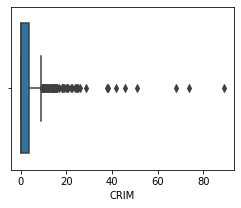

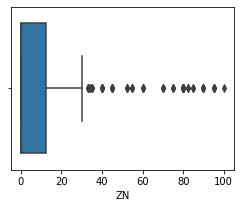

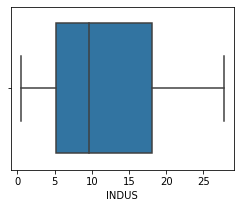

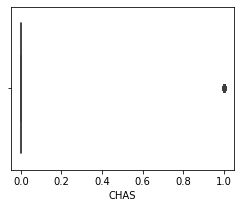

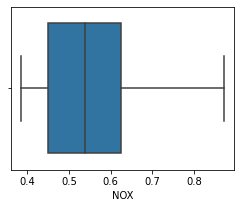

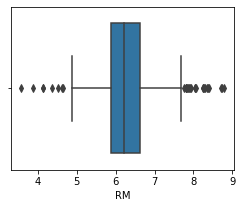

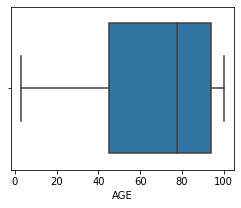

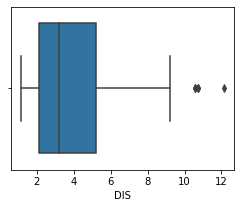

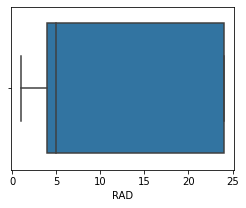

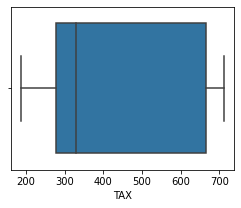

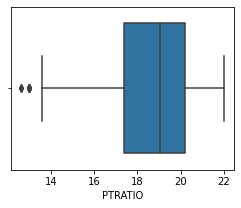

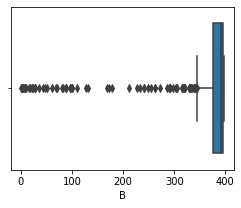

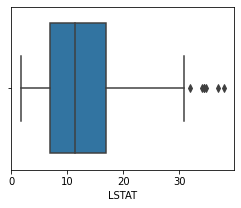

In [12]:
for col in cols:
    plt.figure(figsize=(4, 3))
    get_boxplot(data, columns=[col])

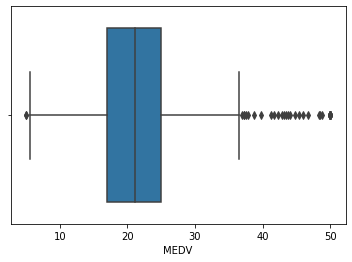

In [13]:
get_boxplot(data, columns=['MEDV'])

#### Seems it's OK, continue

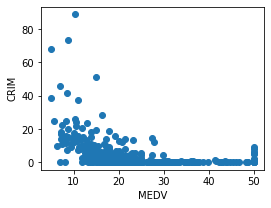

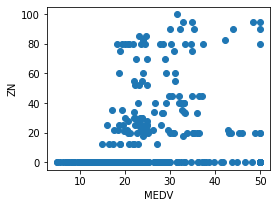

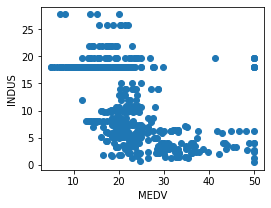

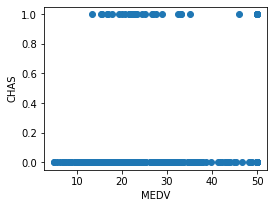

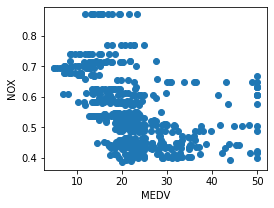

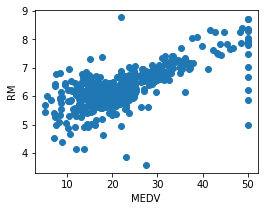

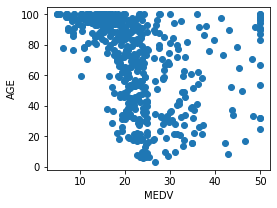

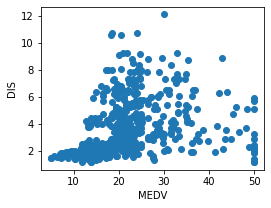

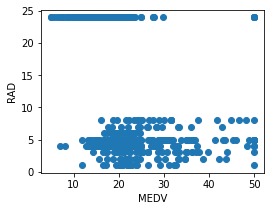

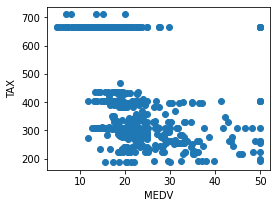

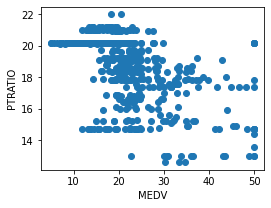

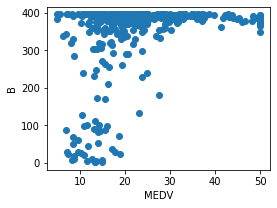

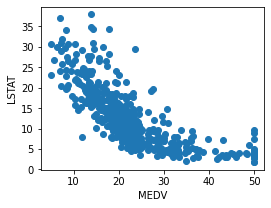

In [14]:
for col in cols:
    plt.figure(figsize=(4, 3))
    plt.xlabel('MEDV')
    plt.ylabel(col)
    plt.scatter(data['MEDV'], data[col])

### Let's see first score for all columns as is

In [15]:
orig_score = get_score(data[cols], data['MEDV'])
orig_score

Model: LinearRegression()     Train score: 0.7434997532004697      Test score: 0.7112260057484991


0.7112260057484991

### Try to remove some columns and check score

In [16]:
good_columns = []
bad_columns = []
for col in cols:
    tmp_cols = cols[:]
    tmp_cols.remove(col)
    tmp_score = get_score(data[tmp_cols], data["MEDV"])
    print(f'Removed {col}:   {tmp_score}      Diff: {round((tmp_score - orig_score) * 100, 2)}%')
    if tmp_score - orig_score < 0:
        good_columns.append(col)
    else:
        bad_columns.append(col)

Model: LinearRegression()     Train score: 0.7354286123018888      Test score: 0.7150613796634283
Removed CRIM:   0.7150613796634283      Diff: 0.38%
Model: LinearRegression()     Train score: 0.7403943521807934      Test score: 0.6978310920990244
Removed ZN:   0.6978310920990244      Diff: -1.34%
Model: LinearRegression()     Train score: 0.7431505938108752      Test score: 0.7124101740617528
Removed INDUS:   0.7124101740617528      Diff: 0.12%
Model: LinearRegression()     Train score: 0.7366653962614387      Test score: 0.7088141357902236
Removed CHAS:   0.7088141357902236      Diff: -0.24%
Model: LinearRegression()     Train score: 0.735550829496123      Test score: 0.6905371882001337
Removed NOX:   0.6905371882001337      Diff: -2.07%
Model: LinearRegression()     Train score: 0.693006042926908      Test score: 0.6830523215989533
Removed RM:   0.6830523215989533      Diff: -2.82%
Model: LinearRegression()     Train score: 0.7431604123283125      Test score: 0.7138676903216847
Remo

In [17]:
good_columns, bad_columns

(['ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'],
 ['CRIM', 'INDUS', 'AGE', 'B'])

### Try to remove all bad columns

In [18]:
get_score(data[good_columns], data["MEDV"])

Model: LinearRegression()     Train score: 0.7246684335198113      Test score: 0.7183142507178609


0.7183142507178609

### Try to use one column for score 

In [19]:
for col in cols:
    tmp_score = get_score(data[[col]], data["MEDV"])
    print(f'Column {col}:   {tmp_score}      Diff: {round((tmp_score - orig_score) * 100, 2)}%')


Model: LinearRegression()     Train score: 0.14474430351351986      Test score: 0.1381400841713265
Column CRIM:   0.1381400841713265      Diff: -57.31%
Model: LinearRegression()     Train score: 0.10858713436626155      Test score: 0.1565421207102632
Column ZN:   0.1565421207102632      Diff: -55.47%
Model: LinearRegression()     Train score: 0.21120312159826238      Test score: 0.26618277902866483
Column INDUS:   0.26618277902866483      Diff: -44.5%
Model: LinearRegression()     Train score: 0.05129632096572434      Test score: -0.06757977975388352
Column CHAS:   -0.06757977975388352      Diff: -77.88%
Model: LinearRegression()     Train score: 0.16538639096372632      Test score: 0.19480719746748199
Column NOX:   0.19480719746748199      Diff: -51.64%
Model: LinearRegression()     Train score: 0.48788928532759923      Test score: 0.45846499343030667
Column RM:   0.45846499343030667      Diff: -25.28%
Model: LinearRegression()     Train score: 0.12285401443239508      Test score: 0.1

### If we want to get max score, so there are columns to be drop:

In [20]:
dropped_columns = ['CHAS', 'INDUS', 'AGE', 'B', 'CRIM']
get_score(data[cols].drop(columns=dropped_columns), data["MEDV"])

Model: LinearRegression()     Train score: 0.7144332093861678      Test score: 0.7213681107542513


0.7213681107542513

#### Interesting - CHAS has something strange, let's remove it.  And I need to recover CRIM and AGE - cause they are important columns (in my opinion)

In [21]:
dropped_columns = ['CHAS', 'INDUS', 'B']
get_score(data[cols].drop(columns=dropped_columns), data["MEDV"])

Model: LinearRegression()     Train score: 0.7250329775886774      Test score: 0.7190459591354749


0.7190459591354749

### So, it's my best score value for this dataset

В датасете нет особо больших отклонений и выбросов, также не вижу ни одной из колонок где понадобилась бы нормализация данных. Пустых данных нет, заполнять ничего не требовалось как и выбор метода заполнения.

### Homework #6

In [22]:
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)


X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.DataFrame(dataset.target, columns=['MEDV'])
df = pd.concat([X,y], axis=1)

In [23]:
X.head(), y.head()

(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 
    PTRATIO       B  LSTAT  
 0     15.3  396.90   4.98  
 1     17.8  396.90   9.14  
 2     17.8  392.83   4.03  
 3     18.7  394.63   2.94  
 4     18.7  396.90   5.33  ,
    MEDV
 0  24.0
 1  21.6
 2  34.7
 3  33.4
 4  36.2)

In [24]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Split test and train data

In [25]:
from sklearn.tree import DecisionTreeRegressor
model_tree_reg = DecisionTreeRegressor(max_depth=2)
model_tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

### Let's check score for tree model

In [26]:
get_score(X, y, model=model_tree_reg)

Model: DecisionTreeRegressor(max_depth=2)     Train score: 0.6995411306336253      Test score: 0.6758436094969433


0.6758436094969433

#### Tree model is good in train, but fail in test :(

### Let's view tree plot

In [27]:
from sklearn.tree import plot_tree

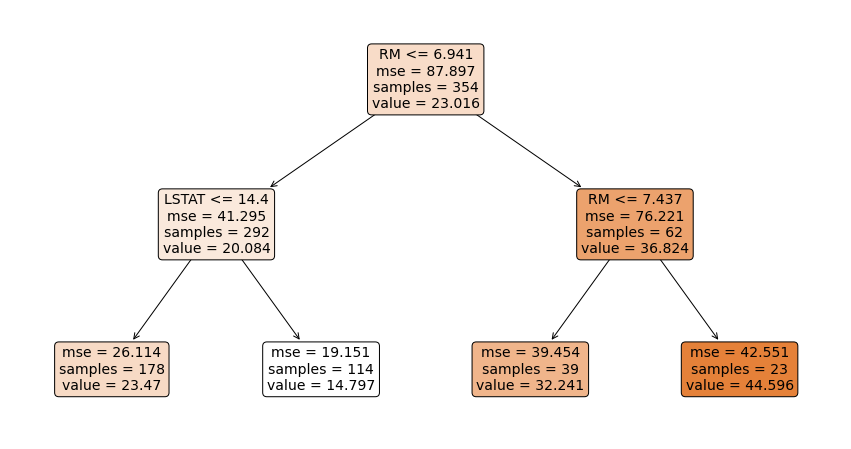

In [28]:
plt.figure(figsize=(15,8))
a = plot_tree(model_tree_reg, 
              feature_names=X.columns, 
              class_names=y, 
              filled=True, 
              rounded=True, 
              fontsize=14)

### Let's try to go deeper (change depth parameter)

In [29]:
for depth_val in range(2,10):
    model = DecisionTreeRegressor(max_depth=depth_val)
    model.fit(X, y)
    get_score(X, y, model=model)

Model: DecisionTreeRegressor(max_depth=2)     Train score: 0.6995411306336253      Test score: 0.6758436094969433
Model: DecisionTreeRegressor(max_depth=3)     Train score: 0.8251584424966962      Test score: 0.7728151817263731
Model: DecisionTreeRegressor(max_depth=4)     Train score: 0.9018563786810155      Test score: 0.7255536066517965
Model: DecisionTreeRegressor(max_depth=5)     Train score: 0.9277198621718044      Test score: 0.7432698040173562
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9478909478313639      Test score: 0.8527405875650357
Model: DecisionTreeRegressor(max_depth=7)     Train score: 0.9688136380520931      Test score: 0.7459748170059839
Model: DecisionTreeRegressor(max_depth=8)     Train score: 0.9800398034333819      Test score: 0.7599129836599258
Model: DecisionTreeRegressor(max_depth=9)     Train score: 0.9848565262719124      Test score: 0.8649645546380198


### Interesting... During increasing a depth in model, train score raising too, but test score stop rising after some values... I think depth=6 is enough for this example.

In [30]:
def test_d6_model(X, y):
    for _ in range(10):
        model_tree_d6 = DecisionTreeRegressor(max_depth=6)
        model_tree_d6.fit(X, y)
        get_score(X, y, model=model_tree_d6)

### View some plot for depth=6

In [31]:
test_d6_model(X, y)

Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9478909478313639      Test score: 0.8624076059837235
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9478909478313639      Test score: 0.8544843644076978
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9478909478313639      Test score: 0.8528774409374977
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9478909478313639      Test score: 0.8594877730628709
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9478909478313639      Test score: 0.8594877730628709
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9478909478313639      Test score: 0.8594877730628709
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9478909478313639      Test score: 0.8555721279875256
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9478909478313639      Test score: 0.7481199612746421
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9478909478313639      Test 

### Used "For" cycle, cause tree model use random data for train, that is why test score changes 

In [32]:
model_tree_d6 = DecisionTreeRegressor(max_depth=6)
model_tree_d6.fit(X, y)

DecisionTreeRegressor(max_depth=6)

### Score is good, it is better than my score from previous Homework#5 (it was 0.7190459591354749)

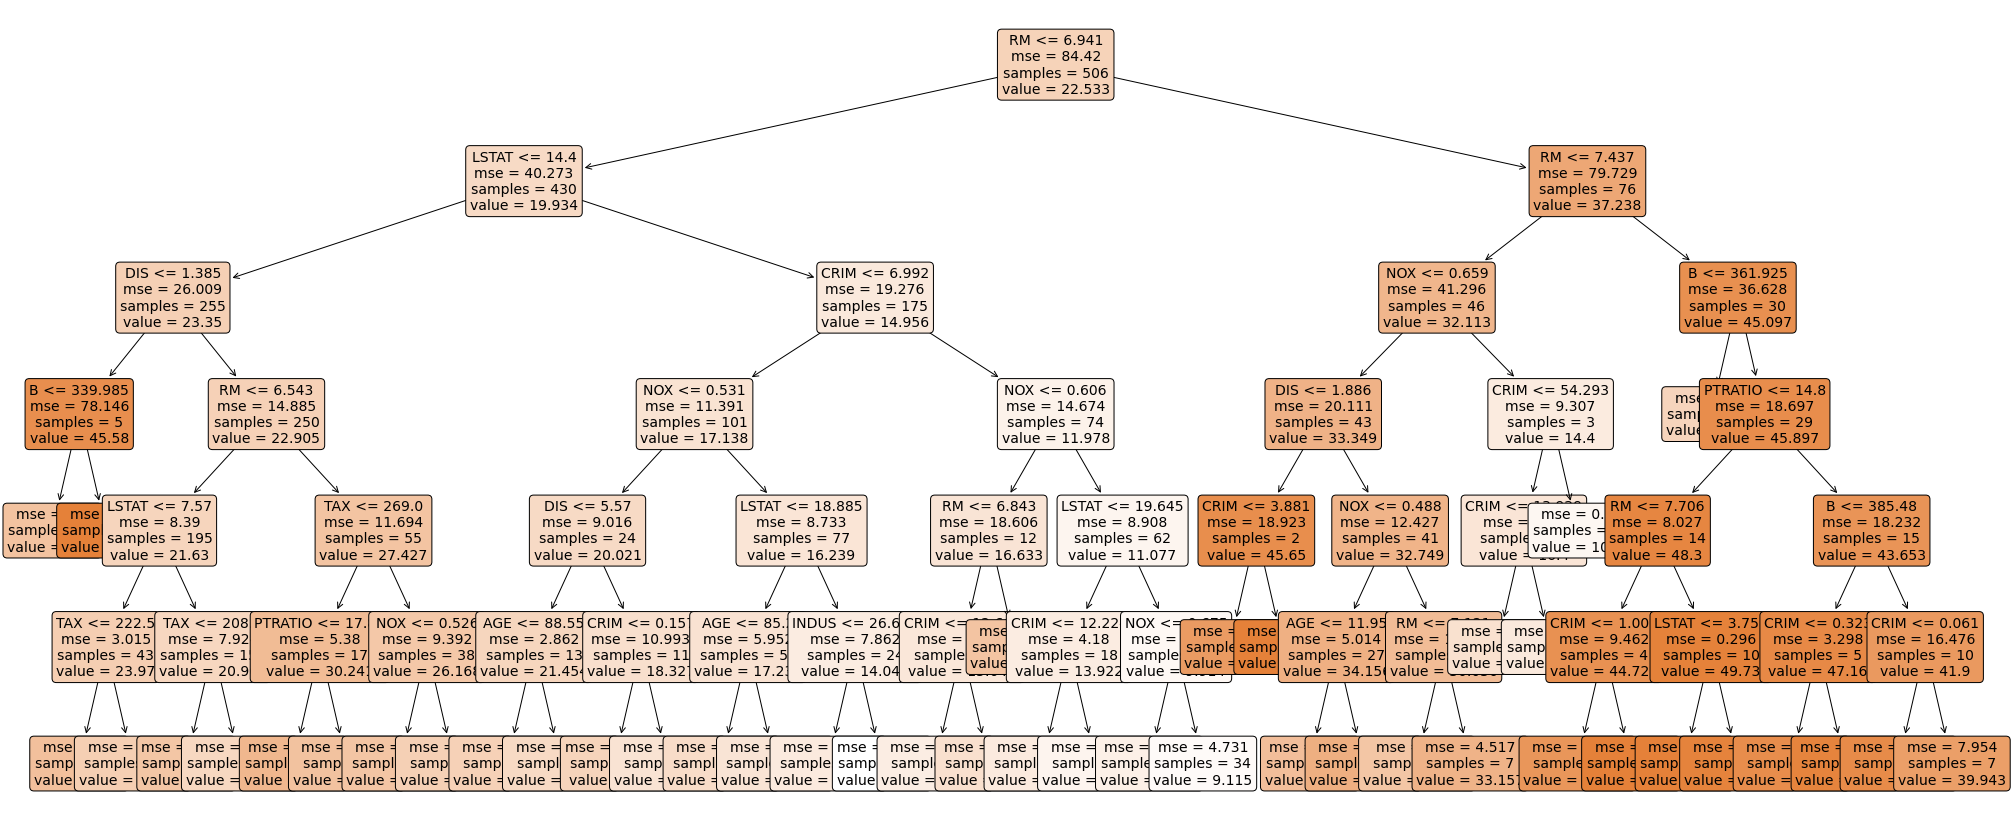

In [33]:
plt.figure(figsize=(35,15)) #need to resize plot to view all params 
a = plot_tree(model_tree_d6, 
              feature_names=X.columns, 
              class_names=y, 
              filled=True, 
              rounded=True, 
              fontsize=14)

### Tree model use RM at first, then LSTAT and RM. (dbl click will increase picture) 
Lets compare with my model from previous homework...
I remove all "bad" columns from my opinion, and try to use "good" columns only in tree model.

In [34]:
dropped_columns = ['CHAS', 'INDUS', 'B']
data.drop(columns=dropped_columns).columns

Index(['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT'],
      dtype='object')

In [35]:
X_good = data.drop(columns=dropped_columns)
X_good.head()

,CRIM,ZN,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


In [36]:
test_d6_model(X_good, y)

Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9469597487847853      Test score: 0.8529803680780053
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9469597487847853      Test score: 0.7475894387907857
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9469597487847853      Test score: 0.8479025975186556
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9469597487847853      Test score: 0.8499777655385055
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9469597487847853      Test score: 0.8440179237962514
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9469597487847853      Test score: 0.740436500211586
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9469597487847853      Test score: 0.8499777655385055
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9469597487847853      Test score: 0.7428056531267219
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.9469597487847853      Test s

### Let's view features

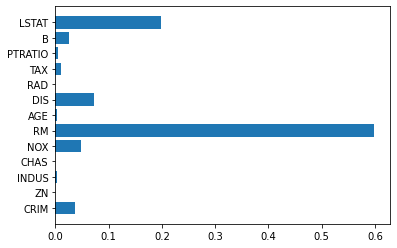

In [37]:
plt.barh(np.arange(len(model_tree_d6.feature_importances_)), model_tree_d6.feature_importances_)
_ = plt.yticks(np.arange(len(X.columns)),X.columns)

### Try to cut useless features:

In [38]:
important_features = ['DIS', 'LSTAT', 'RM', 'CRIM', 'NOX']
X_important = data[important_features]
X_important.head()

,DIS,LSTAT,RM,CRIM,NOX
0,4.0900,4.98,6.575,0.00632,0.538
1,4.9671,9.14,6.421,0.02731,0.469
2,4.9671,4.03,7.185,0.02729,0.469
3,6.0622,2.94,6.998,0.03237,0.458
4,6.0622,5.33,7.147,0.06905,0.458


In [39]:
test_d6_model(X_important, y)

Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.948974251321182      Test score: 0.8520587468883134
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.948974251321182      Test score: 0.8520587468883134
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.948974251321182      Test score: 0.7543785750495529
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.948974251321182      Test score: 0.8563491736920819
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.948974251321182      Test score: 0.8532348029665038
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.948974251321182      Test score: 0.8563491736920819
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.948974251321182      Test score: 0.8520587468883134
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.948974251321182      Test score: 0.8532348029665038
Model: DecisionTreeRegressor(max_depth=6)     Train score: 0.948974251321182      Test score: 0.

In [40]:
get_score(X_important, y)

Model: LinearRegression()     Train score: 0.6777442977184613      Test score: 0.622318367816542


0.622318367816542

### Note: adding some "non important" at first sight featues could increase the final score in some cases.

### For this dataset - tree model is absolutely better then linear model. 